In [3]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_data = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/basic_clean_train.pkl')
test_data = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/basic_clean_test.pkl')

Interaction Features - Creating new interaction features by combing 2 or more columns

In [6]:
train_data['card_intr1'] = train_data['card1'].astype(str) + " " + \
                           train_data['card2'].astype(str) + " " + \
                           train_data['card3'].astype(str) + " " + \
                           train_data['card5'].astype(str) + " " + \
                           train_data['card6'].astype(str)

test_data['card_intr1'] = test_data['card1'].astype(str) + " " + \
                          test_data['card2'].astype(str) + " " + \
                          test_data['card3'].astype(str) + " " + \
                          test_data['card5'].astype(str) + " " + \
                          test_data['card6'].astype(str)

In [7]:
train_data['card1_addr1'] = train_data['card1'].astype(str)+train_data['addr1'].astype(str)
test_data['card1_addr1'] = test_data['card1'].astype(str)+test_data['addr1'].astype(str)

train_data['card1_addr2'] = train_data['card1'].astype(str)+train_data['addr2'].astype(str)
test_data['card1_addr2'] = test_data['card1'].astype(str)+test_data['addr2'].astype(str)

In [8]:
train_data['card2_addr1'] = train_data['card2'].astype(str)+train_data['addr1'].astype(str)
test_data['card2_addr1'] = test_data['card2'].astype(str)+test_data['addr1'].astype(str)

train_data['card2_addr2'] = train_data['card2'].astype(str)+train_data['addr2'].astype(str)
test_data['card2_addr2'] = test_data['card2'].astype(str)+test_data['addr2'].astype(str)

In [9]:
train_data['card3_addr1'] = train_data['card3'].astype(str)+train_data['addr1'].astype(str)
test_data['card3_addr1'] = test_data['card3'].astype(str)+test_data['addr1'].astype(str)

train_data['card3_addr2'] = train_data['card3'].astype(str)+train_data['addr2'].astype(str)
test_data['card3_addr2'] = test_data['card3'].astype(str)+test_data['addr2'].astype(str)

In [10]:
train_data['card5_addr1'] = train_data['card5'].astype(str)+train_data['addr1'].astype(str)
test_data['card5_addr1'] = test_data['card5'].astype(str)+test_data['addr1'].astype(str)

train_data['card5_addr2'] = train_data['card5'].astype(str)+train_data['addr2'].astype(str)
test_data['card5_addr2'] = test_data['card5'].astype(str)+test_data['addr2'].astype(str)

In [11]:
train_data['card6_addr1'] = train_data['card6'].astype(str)+train_data['addr1'].astype(str)
test_data['card6_addr1'] = test_data['card6'].astype(str)+test_data['addr1'].astype(str)

train_data['card6_addr2'] = train_data['card6'].astype(str)+train_data['addr2'].astype(str)
test_data['card6_addr2'] = test_data['card6'].astype(str)+test_data['addr2'].astype(str)

In [12]:
train_data['ProductCD_addr1'] = train_data['ProductCD'].astype(str)+train_data['addr1'].astype(str)
test_data['ProductCD_addr1'] = test_data['ProductCD'].astype(str)+test_data['addr1'].astype(str)

train_data['ProductCD_addr2'] = train_data['ProductCD'].astype(str)+train_data['addr2'].astype(str)
test_data['ProductCD_addr2'] = test_data['ProductCD'].astype(str)+test_data['addr2'].astype(str)

In [13]:
train_data['card1_ProductCD'] =train_data['card1'].astype(str)+train_data['ProductCD'].astype(str)
test_data['card1_ProductCD'] = test_data['card1'].astype(str)+test_data['ProductCD'].astype(str)

train_data['card2_ProductCD'] =train_data['card2'].astype(str)+train_data['ProductCD'].astype(str)
test_data['card2_ProductCD'] = test_data['card2'].astype(str)+test_data['ProductCD'].astype(str)

train_data['card5_ProductCD'] =train_data['card5'].astype(str)+train_data['ProductCD'].astype(str)
test_data['card5_ProductCD'] = test_data['card5'].astype(str)+test_data['ProductCD'].astype(str)

train_data['card6_ProductCD'] = train_data['card6'].astype(str)+train_data['ProductCD'].astype(str)
test_data['card6_ProductCD'] = test_data['card6'].astype(str)+test_data['ProductCD'].astype(str)

In [14]:
train_data['addr1_P_emaildomain'] = train_data['addr1'].astype(str)+train_data['P_emaildomain'].astype(str)
test_data['addr1_P_emaildomain'] = test_data['addr1'].astype(str)+test_data['P_emaildomain'].astype(str)

train_data['card1_P_emaildoman'] = train_data['card1'].astype(str)+train_data['P_emaildomain'].astype(str)
test_data['card1_P_emaildoman'] = test_data['card1'].astype(str)+test_data['P_emaildomain'].astype(str)

train_data['card1_addr1_P_emaildomain'] = train_data['card1'].astype(str)+train_data['addr1_P_emaildomain'].astype(str)
test_data['card1_addr1_P_emaildomain'] = test_data['card1'].astype(str)+test_data['addr1_P_emaildomain'].astype(str)

D Features Normalization

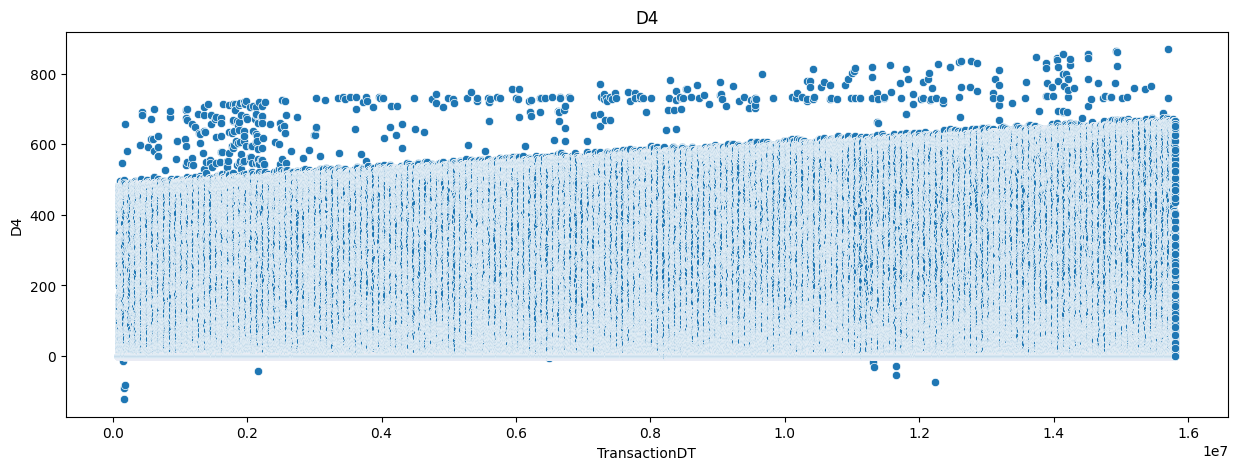

In [15]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='TransactionDT', y='D4', data=train_data)
plt.title('D4')
plt.show()

In [16]:
train_data['TransactionDay'] = train_data['TransactionDT']//(24*3600)
test_data['TransactionDay'] = test_data['TransactionDT']//(24*3600)

In [17]:
d_features = ["D"+str(i) for i in range(1,16) if "D"+str(i) in train_data.columns]

for f in d_features:
    train_data[f] =  train_data[f] - train_data['TransactionDay']
    test_data[f] = test_data[f] - test_data['TransactionDay']

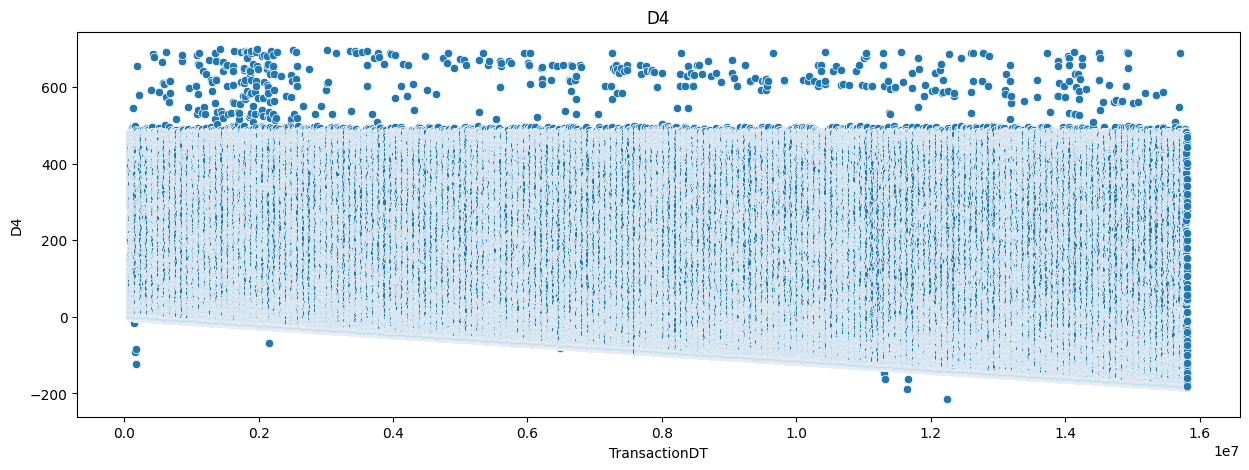

In [18]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='TransactionDT', y='D4', data=train_data)
plt.title('D4')
plt.show()

UID creation for card holder identifier

In [19]:
train_data['uid1'] = train_data['card1'].astype(str)+train_data['card2'].astype(str)+\
                     train_data['card3'].astype(str)+train_data['card5'].astype(str)+\
                     train_data['card6'].astype(str)+train_data['addr1'].astype(str)+\
                     train_data['P_emaildomain'].astype(str)

test_data['uid1'] = test_data['card1'].astype(str)+test_data['card2'].astype(str)+\
                    test_data['card3'].astype(str)+test_data['card5'].astype(str)+\
                    test_data['card6'].astype(str)+test_data['addr1'].astype(str)+\
                    test_data['P_emaildomain'].astype(str)


train_data['uid2'] = train_data['card1'].astype(str)+train_data['addr1_P_emaildomain'].astype(str)
test_data['uid2'] = test_data['card1'].astype(str)+test_data['addr1_P_emaildomain'].astype(str)

In [20]:
def cat_num_features(df):
    
    '''
        Utility Function to get the names of Categorical Features and 
        Numerical Features of the given Dataset.
    '''
    
    catf = []
    numf = []
    
    catf = [
            'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 
            'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 
            'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo',
            'card_intr1', 'card_intr2', 'card1_addr1', 
            'card1_addr2', 'card2_addr1', 'card2_addr2', 'card3_addr1', 'card3_addr2', 
            'card5_addr1', 'card5_addr2', 'card6_addr1', 'card6_addr2', 'ProductCD_addr1', 
            'ProductCD_addr2', 'card1_ProductCD', 'card2_ProductCD', 'card5_ProductCD', 
            'card6_ProductCD', 'addr1_P_emaildomain', 'card1_P_emaildoman', 'card1_addr1_P_emaildomain',
            'uid1', 'uid2'
            ]

    catf+=['id_'+str(i) for i in range(12,39)]


    # Updating the Categorical Feature Names List based on the columns present in the dataframe
    catf = [feature for feature in catf if feature in df.columns]
    numf = [feature for feature in df.columns if feature not in catf and not feature == 'isFraud']
    
    return (catf, numf)  

In [21]:
def label_encode(X_train, X_test, catf):
  
  '''
    Utility Function to Encode Categorical Features.
  '''

  for f in catf:
    
    X_train[f] = X_train[f].astype(str)
    X_test[f] = X_test[f].astype(str)
    
    le = LabelEncoder()
    le.fit(X_train[f])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    X_train[f] = le.transform(X_train[f])
    
    # Manually Encoding the test and Test Dataset so as to avoid error for any category which is not present in train set
    
    # All the categories which are not present in train datset are encoded as -1    
    X_test[f] = [-1 if mapping.get(v, -1)==-1 else mapping[v] for v in X_test[f].values ]

  return (X_train, X_test)

In [22]:
def frequency_encode(train_df, test_df, features):

  '''
    Utility Function to perform frequency encoding for a feature.
  '''

  for f in features:
      
      value_count_dict = train_df[f].value_counts(dropna=True, normalize=True).to_dict()
      name = f+'_FE'  
      train_df[name] = train_df[f].map(value_count_dict) 
      
      # Manually Encoding the feature in test dataset so as to avoid error for a feature value which is not in train set
      
      # Assigning -1 to all the values of the test feature which are not in train set
      test_df[name] = [value_count_dict.get(val, -1) for val in test_df[f].values]

      print(name)
      



# https://www.kaggle.com/kyakovlev/ieee-fe-with-some-eda

def feature_aggregation1(features, uids, train_df, test_df, aggregations=['mean']):
    
    '''
      Utility Function to perform aggregation of a given feature with uid for given statistic.
    '''

    for f in features:  
        for uid in uids:
            for agg_type in aggregations:
                
                name = f+'_'+uid+'_'+agg_type

                temp_df = train_df.groupby([uid])[f].agg([agg_type]).reset_index().rename(columns={agg_type: name})

                temp_df.index = list(temp_df[uid])
                temp_df = temp_df[name].to_dict()   

                train_df[name] = train_df[uid].map(temp_df)

                # Manually Encoding the feature in test dataset so as to avoid error for a feature value which is not in train set
        
                # Assigning -1 to all the values of the test feature which are not in train set
                test_df[name] = [temp_df.get(uid, -1) for uid in test_df[uid].values]

                print(name)

        


def feature_aggregation2(features, uids, train_df, test_df):
  '''
    Utility Function to perform Aggregation based on the number of unique values present in a feature.
  '''

  for f in features:  
      for uid in uids:

          temp_df = train_df[[uid]+[f]]
          
          mp = temp_df.groupby(uid)[f].agg(['nunique'])['nunique'].to_dict()
          
          name = uid+'_'+f+'_ct'

          train_df[name] = train_df[uid].map(mp)

          # Manually Encoding the feature in test dataset so as to avoid error for a feature value which is not in train set
      
          # Assigning -1 to all the values of the test feature which are not in train set
          test_df[name] = [mp.get(uid, -1) for uid in test_df[uid].values]

          print(name)

Data split

In [23]:
X_train = train_data.drop(['isFraud'], axis=1)
y_train = train_data['isFraud']

X_test = test_data
del train_data, test_data

In [24]:
# Storing Categorical and Numerical Feature Names 

catf, numf = cat_num_features(X_train)

In [25]:
# Encoding the Categorical Features

X_train[catf] = X_train[catf].fillna('missing')
X_test[catf] = X_test[catf].fillna('missing')

X_train, X_test = label_encode(X_train, X_test, catf)

In [26]:
# Frequency Encoding

frequency_encode(X_train,X_test,['addr1','card1','card2','card3','P_emaildomain'])
frequency_encode(X_train,X_test,['card1_addr1','card1_addr1_P_emaildomain'])


# Feature Aggregation

feature_aggregation1(['TransactionAmt','D9','D11'],['card1','card1_addr1','card1_addr1_P_emaildomain'],X_train, X_test, ['mean','std'])

addr1_FE
card1_FE
card2_FE
card3_FE
P_emaildomain_FE
card1_addr1_FE
card1_addr1_P_emaildomain_FE
TransactionAmt_card1_mean
TransactionAmt_card1_std
TransactionAmt_card1_addr1_mean
TransactionAmt_card1_addr1_std
TransactionAmt_card1_addr1_P_emaildomain_mean
TransactionAmt_card1_addr1_P_emaildomain_std
D9_card1_mean
D9_card1_std
D9_card1_addr1_mean
D9_card1_addr1_std
D9_card1_addr1_P_emaildomain_mean
D9_card1_addr1_P_emaildomain_std
D11_card1_mean
D11_card1_std
D11_card1_addr1_mean
D11_card1_addr1_std
D11_card1_addr1_P_emaildomain_mean
D11_card1_addr1_P_emaildomain_std


In [27]:
X_train.head(10)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,D9_card1_addr1_mean,D9_card1_addr1_std,D9_card1_addr1_P_emaildomain_mean,D9_card1_addr1_P_emaildomain_std,D11_card1_mean,D11_card1_std,D11_card1_addr1_mean,D11_card1_addr1_std,D11_card1_addr1_P_emaildomain_mean,D11_card1_addr1_P_emaildomain_std
0,2987000,86400,68.5,4,3417,500,42,2,38,2,...,NaN,NaN,NaN,NaN,-88.157895,40.333696,12.000000,NaN,12.000000,NaN
1,2987001,86401,29.0,4,7922,303,42,3,2,2,...,-11.027791,8.852692,-21.250000,NaN,40.727273,187.843959,-10.272727,107.640104,-36.000000,94.783965
2,2987002,86469,59.0,4,9383,389,42,4,58,3,...,NaN,NaN,NaN,NaN,-16.357520,135.205788,49.100000,159.681888,314.500000,0.577350
3,2987003,86499,50.0,4,6991,466,42,3,14,3,...,-55.152669,55.563799,-2.250000,NaN,59.750367,194.356936,91.242718,177.633654,46.138889,127.988873
4,2987004,86506,50.0,1,9262,413,42,3,2,2,...,NaN,NaN,NaN,NaN,69.785714,211.927846,NaN,NaN,NaN,NaN
5,2987005,86510,49.0,4,10366,454,42,4,108,3,...,NaN,NaN,NaN,NaN,31.833333,108.215372,-12.000000,15.099669,-1.000000,0.000000
6,2987006,86522,159.0,4,2009,259,42,4,58,3,...,NaN,NaN,NaN,NaN,0.848276,156.265014,-1.000000,NaN,-1.000000,NaN
7,2987007,86529,422.5,4,2360,389,42,4,108,3,...,-56.345200,54.688250,NaN,NaN,78.426399,199.190057,84.840525,201.664063,-88.375000,60.018896
8,2987008,86535,15.0,1,7962,0,42,4,108,3,...,-47.735215,43.585897,-35.701375,35.819776,47.523724,191.297688,38.296491,195.096033,114.214286,196.623098
9,2987009,86536,117.0,4,6370,10,42,3,106,3,...,-81.399997,57.361130,-59.562419,45.484702,6.926789,159.836333,8.085217,160.662731,43.812500,181.581257


In [28]:
# Adding Month Feature, this will also be used while making final predictions
import datetime
START_DATE = datetime.datetime.strptime('2023-01-01', '%Y-%m-%d')
X_train['DT_M'] = X_train['TransactionDT'].apply(lambda x: (START_DATE + datetime.timedelta(seconds = x)))
X_train['DT_M'] = (X_train['DT_M'].dt.year-2017)*12 + X_train['DT_M'].dt.month 

X_test['DT_M'] = X_test['TransactionDT'].apply(lambda x: (START_DATE + datetime.timedelta(seconds = x)))
X_test['DT_M'] = (X_test['DT_M'].dt.year-2017)*12 + X_test['DT_M'].dt.month 

In [29]:
# FREQUENCY ENCODE UID

frequency_encode(X_train,X_test,['uid1', 'uid2'])


# AGGREGATE UID

feature_aggregation1(['TransactionAmt','D4','D9','D10','D15'],['uid1', 'uid2'],X_train, X_test,['mean','std'])
feature_aggregation1(['C'+str(i) for i in range(1,15) if 'C'+str(i) in X_train.columns],['uid1', 'uid2'],X_train,X_test,['mean'])
feature_aggregation1(['M'+str(i) for i in range(1,10) if 'M'+str(i) in X_train.columns],['uid1', 'uid2'], X_train, X_test,['mean'])
feature_aggregation1(['C14'],['uid1', 'uid2'],X_train,X_test,['std'])


feature_aggregation2(['P_emaildomain','dist1','DT_M','id_02'], ['uid1', 'uid2'],X_train,X_test)
feature_aggregation2(['V127','V307'],['uid1', 'uid2'],X_train,X_test)

uid1_FE
uid2_FE
TransactionAmt_uid1_mean
TransactionAmt_uid1_std
TransactionAmt_uid2_mean
TransactionAmt_uid2_std
D4_uid1_mean
D4_uid1_std
D4_uid2_mean
D4_uid2_std
D9_uid1_mean
D9_uid1_std
D9_uid2_mean
D9_uid2_std
D10_uid1_mean
D10_uid1_std
D10_uid2_mean
D10_uid2_std
D15_uid1_mean
D15_uid1_std
D15_uid2_mean
D15_uid2_std
C1_uid1_mean
C1_uid2_mean
C2_uid1_mean
C2_uid2_mean
C4_uid1_mean
C4_uid2_mean
C5_uid1_mean
C5_uid2_mean
C6_uid1_mean
C6_uid2_mean
C7_uid1_mean
C7_uid2_mean
C8_uid1_mean
C8_uid2_mean
C9_uid1_mean
C9_uid2_mean
C10_uid1_mean
C10_uid2_mean
C11_uid1_mean
C11_uid2_mean
C12_uid1_mean
C12_uid2_mean
C13_uid1_mean
C13_uid2_mean
C14_uid1_mean
C14_uid2_mean
M1_uid1_mean
M1_uid2_mean
M2_uid1_mean
M2_uid2_mean
M3_uid1_mean
M3_uid2_mean
M4_uid1_mean
M4_uid2_mean
M5_uid1_mean
M5_uid2_mean
M6_uid1_mean
M6_uid2_mean
M7_uid1_mean
M7_uid2_mean
M8_uid1_mean
M8_uid2_mean
M9_uid1_mean
M9_uid2_mean
C14_uid1_std
C14_uid2_std
uid1_P_emaildomain_ct
uid2_P_emaildomain_ct
uid1_dist1_ct
uid2_dist1_c

In [30]:
# New Feature 

X_train['outsider15'] = (np.abs(X_train.D1-X_train.D15)>3).astype('int8')
X_test['outsider15'] = (np.abs(X_test.D1-X_test.D15)>3).astype('int8')
print('outsider15')

outsider15


In [31]:
X_train.drop(['uid1', 'uid2'], axis=1, inplace=True)
X_test.drop(['uid1', 'uid2'], axis=1, inplace=True)

In [32]:
X_train['isFraud'] = y_train

In [33]:
# Saving the Feature Engineered Datasets

X_train.to_pickle('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/train_fe.pkl')
X_test.to_pickle('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/test_fe.pkl')

In [34]:
X_train.shape

(590540, 315)